# MNIST_explore


# 索引
[取得MNIST數據集](#取得MNIST數據集)

[展示2X5個子圖圖形](#展示2X5個子圖圖形)

[將下載資料集合成整合一個資料集](#將下載資料集合成整合一個資料集)

## 取得MNIST數據集

網址：http://yann.lecun.com/exdb/mnist/index.html
    
<pre>
1. 訓練數據集影像     ‘train_img’:‘train-images-idx3-ubyte.gz’
                    (壓縮檔大小9.9MB，解壓縮之後47MB，60000張樣本）
2. 訓練數據集標籤     ‘train_label’:‘train-labels-idx1-ubyte.gz’
                    (壓縮檔大小29KB，解壓縮之後60MB，60000張樣本標籤）
3. 測試數據集影像     'test_img':'t10k-images-idx3-ubyte.gz'
                    (壓縮檔大小1.6MB，解壓縮之後7.8MB，10000張樣本）
4. 測試數據集標籤     'test_label':'t10k-labels-idx1-ubyte.gz'}
                    (壓縮檔大小5KB，解壓縮之後10KB，10000張樣本標籤）
</pre>

In [ ]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2

    return images, labels

In [ ]:
!dir

 磁碟區 C 中的磁碟是 BOOTCAMP
 磁碟區序號:  0246-9FF7

 C:\Users\aggie\Downloads\python視覺辨識與機器學習\Day2 的目錄

2020/12/20  下午 08:23    <DIR>          .
2020/12/20  下午 08:23    <DIR>          ..
2020/12/16  下午 03:53         3,146,259 (Slide)Python機器學習&電腦視覺_day2.pdf
2020/12/20  下午 08:23    <DIR>          .ipynb_checkpoints
2020/12/16  下午 12:32           172,854 8-1.bmp
2020/12/16  下午 12:49         1,361,733 8_onearray.jpg
2020/12/16  下午 12:52           986,006 8_onearray_1_2.jpg
2020/12/16  下午 12:49         1,509,659 8_onearray_2.jpg
2020/12/16  下午 12:51           817,634 8_onearray_2_2.jpg
2020/12/16  下午 01:43    <DIR>          image
2020/12/20  下午 08:23             3,529 KNN_scikit learn.ipynb
2020/12/20  下午 08:21             6,484 MNIST_explore.ipynb
2020/12/20  下午 07:13             7,407 python_cv2.ipynb
2020/12/20  下午 07:57             6,396 python_cv2_knn.ipynb
2020/12/20  下午 08:00         1,648,877 t10k-images-idx3-ubyte.gz
2020/12/20  下午 08:00             4,542 t10k-labels-idx1-ubyte.gz
2020/12/2

In [ ]:
import sys
import gzip
import shutil

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('./') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

## 2X5個子圖圖形

In [ ]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [ ]:
X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


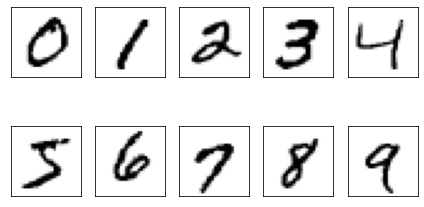

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.savefig('10_2_1.png', dpi=300)
plt.show()

## 將下載資料集合成整合一個資料集

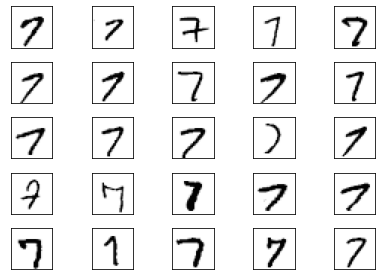

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

In [ ]:
import numpy as np

np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [ ]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [ ]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train',
                                    'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)